---
# Лабораторна робота №7. Структури даних дерево, купа, геш-таблиця.
Author - Kyrylo Klingen
---

# Мета : засвоїти основні функції та алгоритми роботи з деревами та купою засобами Python.

# 1 . Створити бінарне дерево згідно з варіантом, виданим викладачем.


In [ ]:
myTree = [
    'k',                  # root
    ['m',                 # left subtree
        ['n', [], []],    # left child of 'm'
        []                # right child of 'm'
    ],
    ['p',                 # right subtree
        ['q', [], []],    # left child of 'p'
        ['r', [], []]     # right child of 'p'
    ]
]

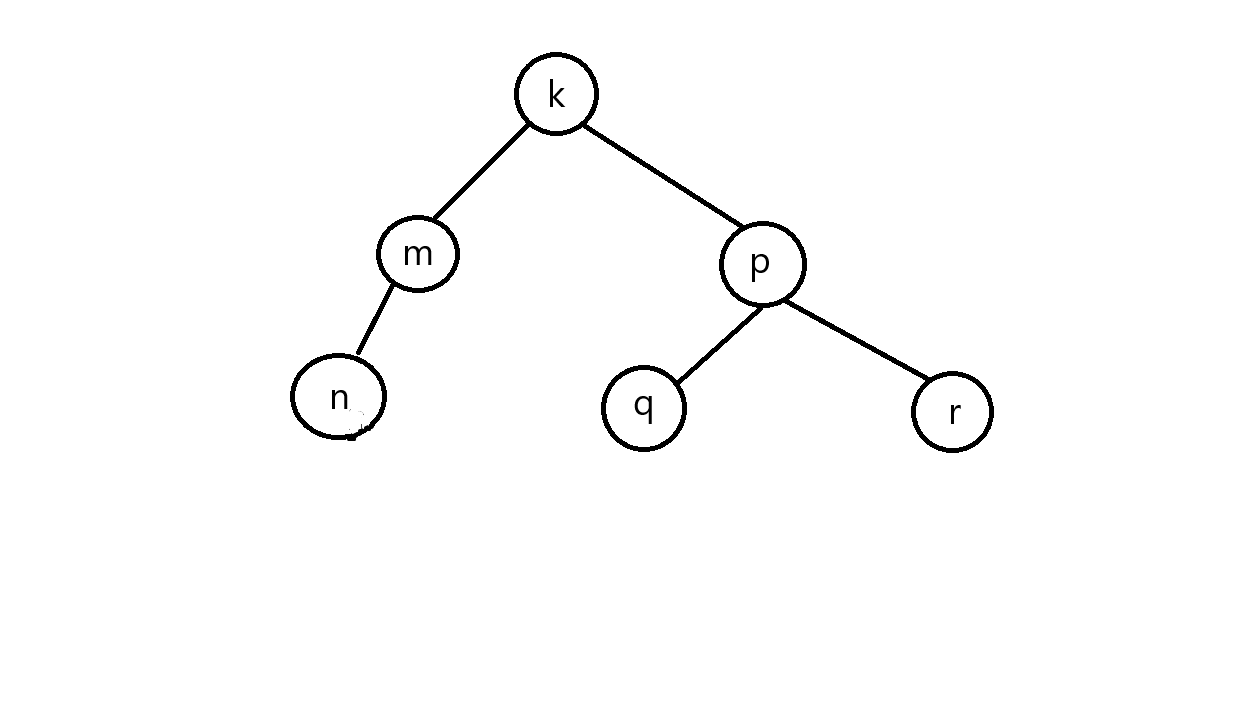

# 2 . Написати процедуру видалення заданої гілки дерева.

In [2]:
def delete_branch(tree, target):
    
    if not tree or tree == []:
        return tree

    if tree[0] == target:
        return [] 

    tree[1] = delete_branch(tree[1], target)
    tree[2] = delete_branch(tree[2], target)

    return tree

Приклад використання

In [ ]:
print("До видалення:")
print(myTree)

myTree = delete_branch(myTree, 'p')

print("Після видалення гілки 'p':")
print(myTree)

# 3 . Оцінити асимптотичну складність (в середньому і в найгіршому випадку) процедур search, insert і delete роботи з деревом.


Search : Найгірший випадок - O(n) , ми проходимо кожну гілку що дійти до потрібної.Середній випадок - O(log n) , ми проходимо до середини (приблизно).

Insert : Найгірший випадок - O(n) , ми проходимо кожну гілку щоб вставити у потрібну позицію.Середній випадок - O(log n) , ми проходимо до середини (приблизно) і вставляємо там.

Delete : Найгірший випадок - O(n) , ми проходимо кожну гілку що дійти до потрібної та видалити її.Середній випадок - O(log n) , ми проходимо до середини (приблизно) і видаляємо потрібну гілку.

# 4 . Написати процедуру генерації купи з будь-якого рандомного масива.


In [ ]:
def heapify(arr, n, i):
    largest = i        
    left = 2 * i + 1   
    right = 2 * i + 2  

    if left < n and arr[left] > arr[largest]:
        largest = left

    if right < n and arr[right] > arr[largest]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  
        heapify(arr, n, largest)

def build_heap(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    return arr

Приклад використання

In [ ]:
import random

arr = [random.randint(1, 100) for _ in range(10)]

print("Початковий масив:", arr)
build_heap(arr)
print("Макс-купа:", arr)

# 5 . Додати до нього елемент, який дорівнює вашому порядковому номеру у списку групи.

In [ ]:
import random

def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[left] > arr[largest]:
        largest = left
    if right < n and arr[right] > arr[largest]:
        largest = right
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def build_heap(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    return arr

def insert_to_heap(heap, value):
    heap.append(value)
    i = len(heap) - 1
    parent = (i - 1) // 2
    while i > 0 and heap[i] > heap[parent]:
        heap[i], heap[parent] = heap[parent], heap[i]
        i = parent
        parent = (i - 1) // 2

arr = [random.randint(1, 100) for _ in range(10)]
print("Початковий масив:", arr)

build_heap(arr)
print("Макс-купа:", arr)

insert_to_heap(arr, 8)
print("Купа після вставки:", arr)

# 6 . Вилучити максимальний елемент з купи.

In [ ]:
def delete_max(heap):
    n = len(heap)
    if n == 0:
        return None  

    max_element = heap[0]
    heap[0] = heap[-1]     
    heap.pop()             
    heapify(heap, len(heap), 0)  
    return max_element

Приклад використання

In [ ]:
removed = delete_max(arr)
print("Видалено максимальний елемент:", removed)
print("Купа після видалення:", arr)

# 7 . Оцінити асимптотичну складність (у середньому і в найгіршому випадку) процедур search, insert і delete роботи з купою.

Search : Найгірший випадок - O(n) , ми проходимо всю купу.Середній випадок - O(n) пошук вимагає перегляду всієї купи тому й у середньому випадку маємо лінійну складність.

Insert : Найгірший випадок - O(log n) , ми вставляємо елемент в кінець купи після чого він сортується між іншими елементами.Середній випадок - O(log n) , аналогічно найгіршому випадку.

Delete : Найгірший випадок - O(log n) , ми видаляємо елемент(зазвичай це корінь або мінімальне значення) після чого відбувається ссув і після цього сортування купи.Середній випадок - O(log n) , аналогічно найгіршому випадку.

# 8 . Реалізуйте геш-таблицю з ланцюжковим гешуванням.

In [6]:
class HashTable:
    def __init__(self, size=10):
        self.size = size
        self.table = [[] for _ in range(self.size)]

    def _hash(self, key):
        return hash(key) % self.size

    def insert(self, key, value):
        index = self._hash(key)
        bucket = self.table[index]

        for i, (k, v) in enumerate(bucket):
            if k == key:
                bucket[i] = (key, value)  # оновлення
                return
        bucket.append((key, value))  # новий запис

    def search(self, key):
        index = self._hash(key)
        bucket = self.table[index]

        for k, v in bucket:
            if k == key:
                return v
        return None  # не знайдено

    def delete(self, key):
        index = self._hash(key)
        bucket = self.table[index]

        for i, (k, v) in enumerate(bucket):
            if k == key:
                del bucket[i]
                return True
        return False  # не знайдено

    def display(self):
        for i, bucket in enumerate(self.table):
            print(f"{i}: {bucket}")

Приклад використання

In [ ]:
ht = HashTable(size=7)

ht.insert("apple", 10)
ht.insert("banana", 20)
ht.insert("orange", 30)
ht.insert("grape", 40)
ht.insert("lemon", 50)

ht.display()

print("Search 'banana':", ht.search("banana"))
ht.delete("banana")
print("Search 'banana' після видалення:", ht.search("banana"))
ht.display()

# 9 . Проведіть тестування геш-таблиці з різними типами даних (цілі числа, рядки, списки, словники, об’єкти).

# 9.1 . Перевірити працездатність геш-таблиці з різними типами даних.

In [ ]:
ht = HashTable(size=10)

ht.insert(1, "один")
ht.insert(42, "відповідь")

ht.insert("ключ", "значення")
ht.insert("hello", 12345)

ht.insert("list", [1, 2, 3])
ht.insert("dict", {"a": 1, "b": 2})

class Person:
    def __init__(self, name):
        self.name = name
    def __repr__(self):
        return f"Person(name={self.name})"

person = Person("Андрій")
ht.insert("obj", person)

ht.display()

print("Search 42:", ht.search(42))
print("Search 'hello':", ht.search("hello"))
print("Search 'dict':", ht.search("dict"))
print("Search 'obj':", ht.search("obj"))

Геш-таблиця працює з усіма наведеними типами даних , але треба враховувати те , що для списків та словників ми використовували індекси як ключі, оскільки вони не можуть бути безпосередньо використані як ключі в геш-таблиці.

# 9.2 . Виміряти час виконання основних операцій (пошук, вставка, видалення) для різних типів даних.

In [10]:
import timeit
import random

def measure_hash_table_time(data, data_type_name):
   
    def insert_data():
        hash_table = {}
        for i, item in enumerate(data):
            hash_table[i] = item
        return hash_table

    def search_data(hash_table):
        for i in range(len(data)):
            hash_table.get(i)

    def delete_data(hash_table):
        for i in range(len(data)):
            hash_table.pop(i, None)

    insert_time = timeit.timeit(insert_data, number=100)
    print(f"Вставка ({data_type_name}): {insert_time:.6f} сек")

    hash_table = insert_data() 
    search_time = timeit.timeit(lambda: search_data(hash_table), number=100)
    print(f"Пошук ({data_type_name}): {search_time:.6f} сек")

    delete_time = timeit.timeit(lambda: delete_data(hash_table), number=100)
    print(f"Видалення ({data_type_name}): {delete_time:.6f} сек")

data_int = list(range(1000))
print("Тестування з цілими числами:")
measure_hash_table_time(data_int, "цілі числа")

data_str = [str(i) for i in range(1000)]
print("\nТестування з рядками:")
measure_hash_table_time(data_str, "рядки")

data_list = [[i] for i in range(1000)]
print("\nТестування зі списками:")
measure_hash_table_time(data_list, "списки")

data_dict = [{str(i): i} for i in range(1000)]
print("\nТестування зі словниками:")
measure_hash_table_time(data_dict, "словники")

class MyObject:
    def __init__(self, value):
        self.value = value

    def __eq__(self, other):
        return self.value == other.value

data_obj = [MyObject(i) for i in range(1000)]
print("\nТестування з об'єктами:")
measure_hash_table_time(data_obj, "об'єкти")

Тестування з цілими числами:
Вставка (цілі числа): 0.004965 сек
Пошук (цілі числа): 0.004693 сек
Видалення (цілі числа): 0.003293 сек

Тестування з рядками:
Вставка (рядки): 0.006160 сек
Пошук (рядки): 0.009329 сек
Видалення (рядки): 0.015834 сек

Тестування зі списками:
Вставка (списки): 0.011244 сек
Пошук (списки): 0.005538 сек
Видалення (списки): 0.003386 сек

Тестування зі словниками:
Вставка (словники): 0.008743 сек
Пошук (словники): 0.005366 сек
Видалення (словники): 0.003442 сек

Тестування з об'єктами:
Вставка (об'єкти): 0.005075 сек
Пошук (об'єкти): 0.004936 сек
Видалення (об'єкти): 0.003079 сек


# 9.3 . Порівняти результати для різних типів даних.

Цілі числа : Взагалом найшвидші (у списках швидкість може бути більша тому що там як ключ використовувалися також цілі числа,об'єкт використанний для тестування був простим тому він також дуже швидко був прохешований).

Рядки : Трохи повільніші за цілі числа та більш складні для хешування та порівняння.

Списки : Взагалом повільний.

Словники : Аналогічна ситуація як у списків.

Об'єкти : Тут залежить від складності об'єкта , в нас він простий тому він має велику швидкість.


# 10 . Контрольні питання.


* Чим відрізняється структура бінарне дерево він бінарного дерева пошуку? - Бінарне дерево - це ієрархічна структура даних, де кожен вузол має не більше двох дочірніх вузлів. Бінарне дерево пошуку - це бінарне дерево, в якому для кожного вузла всі ключі в лівому піддереві менші за ключ вузла, а всі ключі в правому піддереві більші.
  
* Чим відрізняється структура бінарне дерево від бінарної купи? - Бінарне дерево - це ієрархічна структура даних, де кожен вузол має не більше двох дочірніх вузлів, але порядок вузлів не має особливого значення. Бінарна купа - це специфічне бінарне дерево, яке задовольняє властивість купи: значення батьківського вузла завжди більше (або менше) значень його дочірніх вузлів, і воно, як правило, є повним або майже повним деревом.

* Які існують типи дерев? Опишіть їхні основні характеристики та переваги. - 1.Бінарне дерево - Кожен вузол має не більше двох дочірніх вузлів (лівий і правий).Простий у реалізації та доволі швидкий.2.Бінарне дерево пошуку - Бінарне дерево, де для кожного вузла всі ключі в лівому піддереві менші за ключ вузла, а всі ключі в правому піддереві більші.Швидкий пошук, вставка та видалення в середньому випадку (O(log n)).3.Купа - Бінарне дерево, яке задовольняє властивість купи: значення батьківського вузла завжди більше (або менше) значень його дочірніх вузлів.Швидке отримання максимального або мінімального елемента (O(1)).4.Збалансовані дерева - Бінарні дерева пошуку, які підтримують баланс, щоб запобігти виродженню в зв'язаний список.Гарантований швидкий пошук, вставка та видалення (O(log n)).

* Наведіть приклади задач, які ефективно вирішуються за допомогою дерев. - Пошук даних , сортування , ієрархічні структури даних , дерева рішень.

* Як організована купа? Опишіть алгоритми додавання та вилучення елементів з купи. -  Купа організована таким чином, що корінь дерева містить найбільший (або найменший) елемент.Алгоритми додавання в купу : Додавання елемента в кінець купи , «просіювання вгору» - Порівняння з батьківським вузлом та заміна при порушенні властивостей.Алгоритми вилучення : Вилучення кореневого елемента - останній елемент купи переміщується на місце корневого , «просіювання вниз» - порівняння з дочірними вузлами та заміна при порушенні властивостей купи.

* Які задачі можна ефективно вирішити за допомогою купи? Наведіть приклади. - Алгоритм Дейсктри , черги з пріорітетами , алгоритм сортування HeapSort.

* Як геш-функція використовується для зберігання та пошуку даних в хеш-таблиці? - Ключі перетворюються на геш-код , який потім використовується для визначення індексу в масиві де зберігаються дані.Для пошуку за ключем хеш-функція знову обчислює хеш-код ключа та за ним шукає індекс у масиві де зберігаються дані та якщо воно там є то повертає дані.

*Опишіть методи вирішення колізій в хеш-таблицях. Які їхні переваги та недоліки? - Метод ланцюгів - Кожна комірка хеш-таблиці містить покажчик на зв'язаний список (ланцюжок) елементів, які хешуються в цей індекс.Переваги : Простий , може обробляти велику кількість колізій.Недоліки : Може призвести до погіршення продуктивності, якщо ланцюжки стають довгими.Відкрита адресація - Всі елементи зберігаються безпосередньо в хеш-таблиці , при виникненні колізії шукається інша порожня комірка для вставки нового елемента.Переваги : Використовує менше пам'яті, ніж метод ланцюжків.Може бути швидшим, якщо хеш-таблиця не сильно заповнена.Недоліки : Може бути складнішим у реалізації.Продуктивність погіршується, якщо хеш-таблиця стає заповненою.Метод об'єднаного хешування - Розв'язує колізії за допомогою додаткових ланок між вузлами зв'язаних списків всередині таблиці.Переваги : Як і метод ланцюжків, не має кластерних ефектів.Геш-таблиця може бути ефективно заповнена.Недоліки : складна реалізація.

# 11 . Висновок.

На цій лабараторній роботі ми засвоїли основні функції та алгоритми роботи з деревами та купою засобами Python.